In [1]:
# 2018/5/30
# 本文有 Matploylib 注解画图

In [2]:
import numpy as np

In [3]:
# 程序清单3-1 计算给定数据集的香农熵
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [4]:
def createDataSet():
    dataSet = [
              [1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [5]:
myDat, labels = createDataSet()
print(myDat)
print(calcShannonEnt(myDat))

myDat[0][-1] = 'maybe'  # 熵越高，则混合的数据也越多
print(calcShannonEnt(myDat))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.9709505944546686
1.3709505944546687


In [6]:
a = [1, 2, 3]
b = [4, 5, 6]
a.append(b)
print(a)

[1, 2, 3, [4, 5, 6]]


In [7]:
a = [1, 2, 3]
b = [4, 5, 6]
a.extend(b)
print(a)

[1, 2, 3, 4, 5, 6]


In [8]:
#程序清单 3-2 按照给定特征划分数据集
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] 
            reducedFeatVec.extend(featVec[axis + 1 : ])
            retDataSet.append(reducedFeatVec)
    return retDataSet 

In [9]:
myDat, labels = createDataSet()
print(myDat)

print(splitDataSet(myDat, 0, 1))
print(splitDataSet(myDat, 0, 0))
print(splitDataSet(myDat, 1, 1))
print(splitDataSet(myDat, 1, 0))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
[[1, 'no']]


In [10]:
a = np.array([1, 2, 3])
print(a[:0])
print(a[:1])
print(a[:2])
print(a[:3])
print('\n')
print(a[0:])
print(a[1:])
print(a[2:])
print(a[3:])

[]
[1]
[1 2]
[1 2 3]


[1 2 3]
[2 3]
[3]
[]


In [11]:
# 程序清单 3-3 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
#     print(dataSet[0])
#     print(numFeatures)
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in np.arange(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet) 
        infoGain = baseEntropy - newEntropy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [12]:
myDat, labels = createDataSet()
print(chooseBestFeatureToSplit(myDat))


print('\n')
for i in np.arange(2):
    a = [b[i] for b in myDat]
    print(a)
    print('1', set(a))
print(a)

a = [b[-1] for b in myDat]
print(a)

0


[1, 1, 1, 0, 0]
1 {0, 1}
[1, 1, 0, 1, 1]
1 {0, 1}
[1, 1, 0, 1, 1]
['yes', 'yes', 'no', 'no', 'no']


In [13]:
# 如果数据集已经处理了所有属性，但是类标签依然不是唯一的，此时我们需要决定如何定义该叶子节点，
# 在这种情况下，我们通常会采用 多数表决的方法决定该叶子节点的分类
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    
    newvalue = -1
    for key in classCount:
        if newvalue < classCount[key]:
            newkey = key
            newvalue = classCount[key]
    return newkey

In [14]:
# 程序清单 3-4 创建树的函数代码
def createTree(dataSet, labels): # 两个输入参数-- 数据集， 标签列表
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]   # 如果类别完全相同则停止继续划分
    
    if len(dataSet[0]) == 1:  # 遍历完所有特征时返回出现次数最多的类别
        return majorityCnt(classList) 
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]  # 这行代码复制了类标签
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels) # 字典的嵌套
        #print('1  ',bestFeatLabel,' ',value,' ',myTree[bestFeatLabel][value])
    #print('2 ',myTree, '\n')
    return myTree

In [15]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
print(myTree)
# {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [16]:
a = [1, 3, 4, 1, 3, 5, 6, 1]
print(a)
print(a.count(1))

b = a[:]
print(b)

[1, 3, 4, 1, 3, 5, 6, 1]
3
[1, 3, 4, 1, 3, 5, 6, 1]


In [17]:
# 字典 嵌套
s = {'no sur':{}}
s['no sur'][0] = 'no'
print(s)

ss = {'fli':{}}
ss['fli'][0] = 'no'
ss['fli'][1] = 'yes'

s['no sur'][1] = ss
print(s)
print(s['no sur'][1])
print(s['no sur'][1]['fli'][1])

{'no sur': {0: 'no'}}
{'no sur': {0: 'no', 1: {'fli': {0: 'no', 1: 'yes'}}}}
{'fli': {0: 'no', 1: 'yes'}}
yes


# 3.2 在python中使用 Matplotlib 注解绘制树形图

In [18]:
# 程序清单 3-5 使用文本注解绘制树节点
import matplotlib.pyplot as plt

# 定义文本框和箭头格式
# 下面的字典定义也可写作 decisionNode={boxstyle:'sawtooth',fc:'0.8'}  
# boxstyle为文本框的类型，sawtooth是锯齿形，fc是边框线粗细  
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc = "0.8") # 定义决策树的叶子结点的描述属性  
arrow_args = dict(arrowstyle = "<-")#决策树的箭头属性

# 绘制带箭头的注解
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    # annotate 是关于一个数据点的文本
    # nodeTxt  为要显示的文本
    # centerPt 为文本的中心点，箭头所在的点
    # parentPt 为指向文本的点
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = "axes fraction", \
                           xytext = centerPt, textcoords = "axes fraction", \
                           va = "center", ha = "center", bbox = nodeType, arrowprops = arrow_args)

def createPlot():
    fig = plt.figure(1, facecolor = "white") # 定义一个画布，背景为白色
#     plt.figure(figsize = (10, 10))
    fig.clf() # 画布清空
    # createPlot.ax1为全局变量，绘制图像的句柄，subplot为定义了一个绘图，111表示figure中的图有1行1列，即1个，最后的1代表第一个图 
    # frameon表示是否绘制坐标轴矩形 
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode) # 绘制节点
    plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)       # 绘制节点
    plt.show()

createPlot()

In [19]:
# 程序清单 3-6 获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    # 定义叶子节点数目
    numLeafs = 0 
    # 在python2.x中，dict.keys()返回一个列表，在python3.x中，dict.keys()返回一个dict_keys对象，
    # 比起列表，这个对象的行为更像是set，所以不支持索引的。
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
#     print('88 ',firstStr)
#     print(secondDict)
    for key in secondDict.keys():
        if isinstance(secondDict[key], dict):  # 测试节点的数据类型是否为字典
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


In [20]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if isinstance(secondDict[key], dict): # 测试节点的数据类型是否为字典
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth


In [21]:
# 测试
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)

print(myTree)

print(getNumLeafs(myTree))
print(getTreeDepth(myTree))

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
3
2


In [22]:
# 为了节省时间，函数 retrieveTree 输出预先存储的树的信息，避免每次测试代码都要从数据中创建树的麻烦
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': { 0 : {0: 'no', 1: 'yes'}, 1 : 'no'}}}}
            ]
    return listOfTrees[i]

In [23]:
# 测试
print(retrieveTree(1))
myTree = retrieveTree(0)
print(getNumLeafs(myTree))
print(getTreeDepth(myTree))

{'no surfacing': {0: 'no', 1: {'flippers': {0: {0: 'no', 1: 'yes'}, 1: 'no'}}}}
3
2


In [24]:
# 程序清单 3-7 plotTree函数

# 绘制中间文本 -->> 在父子节点间填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    # 求中间点的横坐标
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    # 求中间点的纵坐标
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    # 绘制树节点
    createPlot.ax1.text(xMid, yMid, txtString)

# 绘制决策树
def plotTree(myTree, parentPt, nodeTxt):
    # 定义并获得决策树的叶子节点数
    numLeafs = getNumLeafs(myTree)
    # 获得决策树深度
    depth = getTreeDepth(myTree)
    # 得到第一个特征
    firstStr = list(myTree.keys())[0]
    # 计算坐标， X坐标为当前树的叶子节点数目除以 整个树的叶子节点数 再除以 2 ，y 为起点
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    
    plotMidText(cntrPt, parentPt, nodeTxt)
    
    # 绘制决策树节点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根据 firstStr 找到相应的值
    secondDict = myTree[firstStr]
    # 因为进入下一层，所以 y 的坐标要变，图像坐标是从左上角为原点
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    
    # 遍历 secondDict
    for key in secondDict.keys():
        if isinstance(secondDict[key], dict):
            plotTree(secondDict[key], cntrPt, str(key)) # 递归绘制决策树
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW  # 计算叶子节点横坐标
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode) # 绘制叶子节点
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key)) # 特征的值
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD # 计算纵坐标

def createPlot(inTree):
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    # 定义横纵坐标轴，无内容
    axprops = dict(xticks = [], yticks = [])
    # 绘制图像，无边框，无内容
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)
    # 树的宽度
    plotTree.totalW = float(getNumLeafs(inTree))
    # 树的高度
    plotTree.totalD = float(getTreeDepth(inTree))
    # 决策树起始横坐标
    plotTree.xOff = - 0.5 / plotTree.totalW
#     print(plotTree.xOff)
    # 决策树的起始纵坐标
    plotTree.yOff = 1.0
    # 绘制决策树
    plotTree(inTree, (0.5, 0.1), '')
    # 显示图像
    plt.show()
        

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}


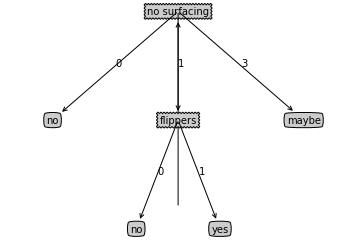

In [25]:
myTree = retrieveTree(0)

myTree['no surfacing'][3] = 'maybe'
print(myTree)
createPlot(myTree)

# 使用决策树执行分类

In [26]:
# 程序清单3-8 使用决策树的分类函数
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    print('1 ',featIndex)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if isinstance(secondDict[key], dict):
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [27]:
myDat, labels = createDataSet()
print(labels)
myTree = retrieveTree(0)
print(myTree)
print(classify(myTree, labels, [1, 0]))
print(classify(myTree, labels, [1, 1]))

['no surfacing', 'flippers']
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
1  0
1  1
no
1  0
1  1
yes


In [28]:
# 程序清单 3-9 使用pickle模块存储决策树
import pickle
def storeTree(inputTree, filename):
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    
def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [29]:
myDat, labels = createDataSet()
print(labels)
myTree = retrieveTree(0)

storeTree(myTree, r'Ch03\a.txt')

print(grabTree(r'Ch03\a.txt'))

['no surfacing', 'flippers']
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


# 使用决策树预测隐形眼镜类型

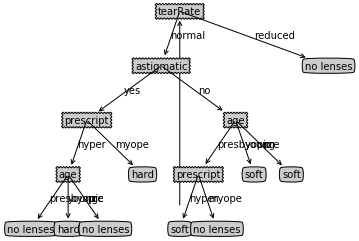

In [31]:
fr = open('/home/gcb/data/lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
# print(lenses)
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
# print(lensesTree)
createPlot(lensesTree)